In [1]:
from util_multi import *
%load_ext autoreload

In [55]:
%autoreload

# Gaussian Clusters Example - 3 clusters

Note now we don't calculate the EEM method for choosing queries because we haven't generalized the 0-1 risk calculation of Zhu et al for the multiclass case. So in the multiclass case we are just showing V and $\Sigma$ optimality choices.

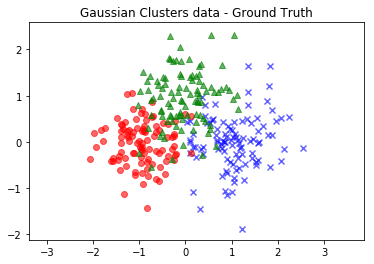

In [67]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [100,100,100]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.]), np.array([0.,1.0])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2), 0.3*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[2] = [Ns[0] + i for i in range(fs)]
fid_orig[3] = [Ns[0]+ Ns[1] + i for i in range(fs)]
ground_truth = np.ones(N,dtype='int')
ground_truth[Ns[0]:Ns[0]+Ns[1]] = 2
ground_truth[Ns[0]+Ns[1]:] = 3

# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W)

# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.01
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20

class1_ind = np.where(ground_truth == 1)[0]
class2_ind = np.where(ground_truth == 2)[0]
class3_ind = np.where(ground_truth == 3)[0]

# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[class1_ind,0], X[class1_ind,1], marker='x', c='b', alpha=0.6)
plt.scatter(X[class2_ind,0], X[class2_ind,1], marker='o', c='r',alpha=0.6)
plt.scatter(X[class3_ind,0], X[class3_ind,1], marker='^', c='g',alpha=0.6)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

calc_orig_multi took 0.006325 seconds
Iter = 0


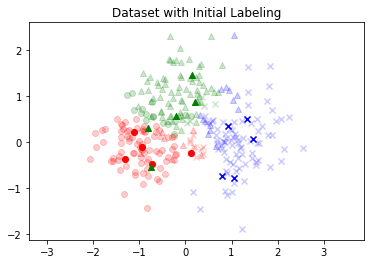

Time for S_opt = 0.000938
Time for S_opt = 0.000339
Time for S_opt = 0.000295
Time for S_opt = 0.000276
Time for S_opt = 0.000861
Iter = 1


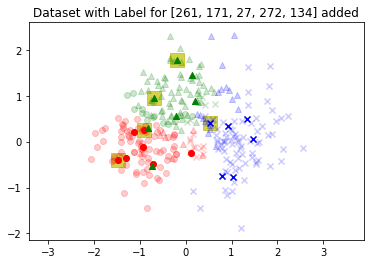

Time for S_opt = 0.000330
Time for S_opt = 0.000179
Time for S_opt = 0.000265
Time for S_opt = 0.000206
Time for S_opt = 0.000174
Iter = 2


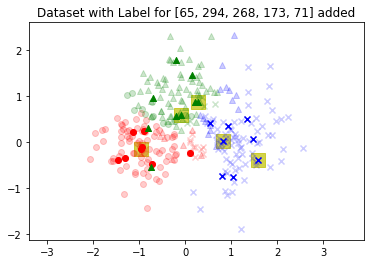

Time for S_opt = 0.000388
Time for S_opt = 0.000228
Time for S_opt = 0.000216
Time for S_opt = 0.000216
Time for S_opt = 0.000208
Iter = 3


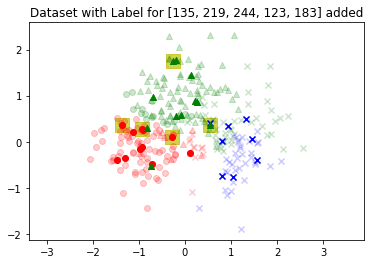

Time for S_opt = 0.000498
Time for S_opt = 0.000181
Time for S_opt = 0.000246
Time for S_opt = 0.000293
Time for S_opt = 0.000691
Iter = 4


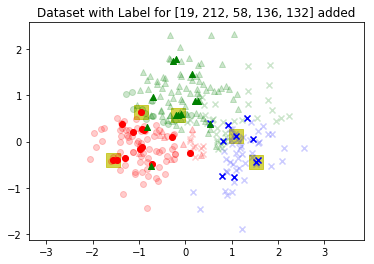

[(-1, 0.18000000000000005), ([261, 171, 27, 272, 134], 0.18999999999999995), ([65, 294, 268, 173, 71], 0.17666666666666664), ([135, 219, 244, 123, 183], 0.2833333333333333), ([19, 212, 58, 136, 132], 0.23333333333333328)]


In [68]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
method = 'S'
batch_size = 5
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_S)

calc_orig_multi took 0.002713 seconds
Iter = 0


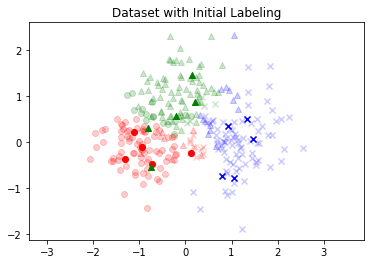

Time for V_opt = 0.000692
Time for V_opt = 0.000706
Time for V_opt = 0.000397
Time for V_opt = 0.000369
Time for V_opt = 0.000367
Iter = 1


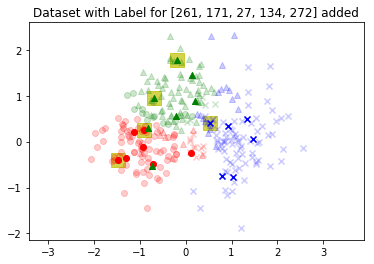

Time for V_opt = 0.000860
Time for V_opt = 0.000433
Time for V_opt = 0.000447
Time for V_opt = 0.000382
Time for V_opt = 0.000380
Iter = 2


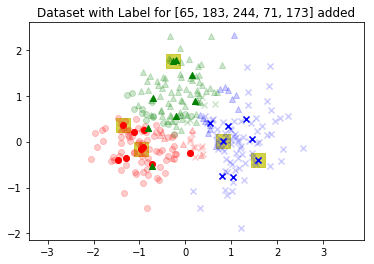

Time for V_opt = 0.000515
Time for V_opt = 0.000652
Time for V_opt = 0.000794
Time for V_opt = 0.000381
Time for V_opt = 0.000377
Iter = 3


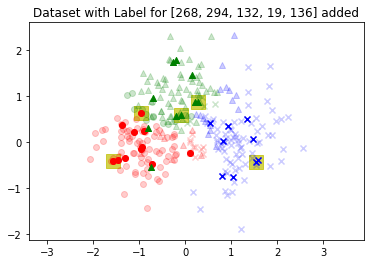

Time for V_opt = 0.001072
Time for V_opt = 0.000580
Time for V_opt = 0.000684
Time for V_opt = 0.000458
Time for V_opt = 0.000515
Iter = 4


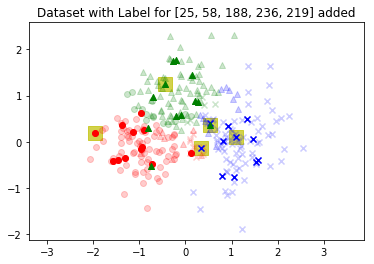

[(-1, 0.18000000000000005), ([261, 171, 27, 134, 272], 0.18999999999999995), ([65, 183, 244, 71, 173], 0.18000000000000005), ([268, 294, 132, 19, 136], 0.18333333333333335), ([25, 58, 188, 236, 219], 0.17333333333333334)]


In [69]:
# Active Learning - V optimal multiclass
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
method = 'V'
batch_size = 5
test_opts = (batch_size, num_iters, verbose)
ERRS_V, M_V = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_V)

## Compare to Random Sampling

calc_orig_multi took 0.007546 seconds
Iter = 0


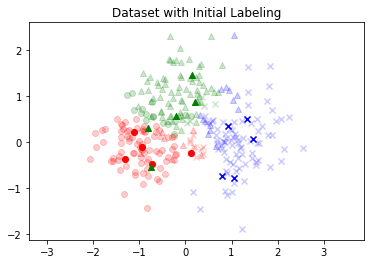

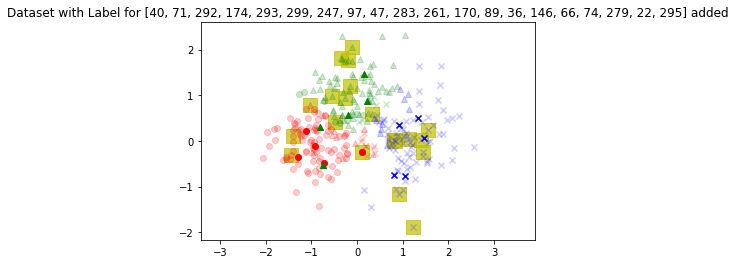

[(-1, 0.18000000000000005), ([40, 71, 292, 174, 293, 299, 247, 97, 47, 283, 261, 170, 89, 36, 146, 66, 74, 279, 22, 295], 0.15000000000000002)]


In [72]:
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, True)
show_all_iters = False
ERRS_rand, M_rand = run_test_rand_multi(X, v, w, fid, ground_truth, tag2, 
                                        test_opts,show_all_iters=show_all_iters)

if verbose:
    print(ERRS_rand)

## Convergence Comparison

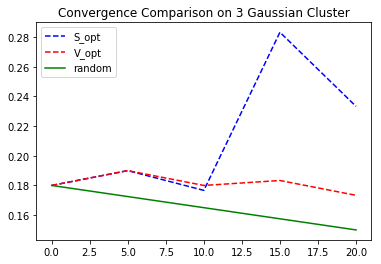

In [73]:
num_batches = int(num_iters/batch_size)
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'b--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.title('Convergence Comparison on 3 Gaussian Cluster')
plt.legend()

# 2 Moons Example


We check the compatibility of the binary case (with labels $-1,+1$) with the newly written `*_multi` functions

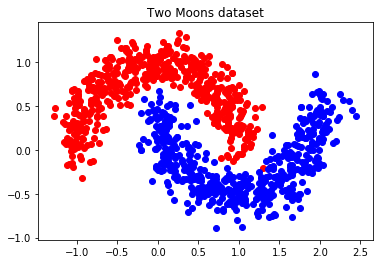

In [75]:
# Setup
N = 1000
data = make_moons(N, noise=0.15)

X, ground_truth = data
X1, X2 = X[ground_truth == 0,:], X[ground_truth == 1,:] 
ground_truth[np.where(ground_truth == 0)] = -1

#plt.rcParams['figure.figsize'] =(6,6)
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='b')
plt.title('Two Moons dataset')
plt.show()



# Define the labeled and unlabed indices
sup_percent = 0.1
indices = np.array(list(range(N)))
labeled_orig = set()
fid_orig = {}
gt_flipped = {}
for i in [1,-1]:
    i_mask = indices[ground_truth ==i]
    gt_flipped[i] = i_mask
    np.random.shuffle(i_mask)
    n_i = len(i_mask)
    fid_orig[i] = list(i_mask[:int(sup_percent*n_i)])
    labeled_orig = labeled_orig.union(set(fid_orig[i]))
unlabeled_orig = sorted(list(set(indices) - labeled_orig))
labeled_orig = sorted(list(labeled_orig))


# Graph Generation and Eigen-Calculation
W = make_sim_graph(X)
w,v = get_eig_Lnorm(W)


# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.01
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 5
tag2 = (tau, alpha, gamma2)
test_opts = (batch_size, num_iters, verbose)

calc_orig_multi took 0.156217 seconds
Iter = 0


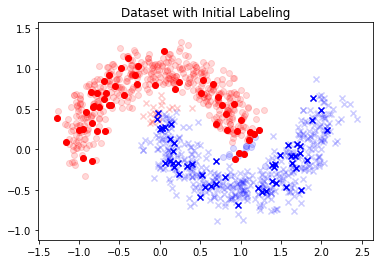

Time for S_opt = 0.001489
Time for S_opt = 0.002818
Time for S_opt = 0.003850
Time for S_opt = 0.005330
Time for S_opt = 0.002053
Iter = 1


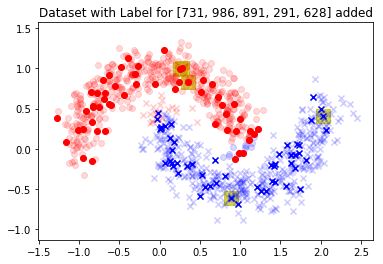

Time for S_opt = 0.008282
Time for S_opt = 0.002523
Time for S_opt = 0.002194
Time for S_opt = 0.002145
Time for S_opt = 0.002443
Iter = 2


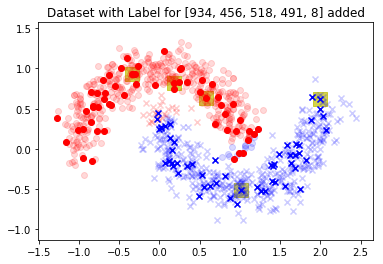

Time for S_opt = 0.002465
Time for S_opt = 0.001587
Time for S_opt = 0.002526
Time for S_opt = 0.002351
Time for S_opt = 0.004169
Iter = 3


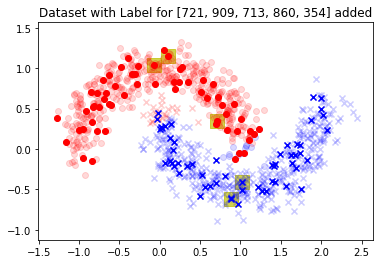

Time for S_opt = 0.002154
Time for S_opt = 0.002365
Time for S_opt = 0.001839
Time for S_opt = 0.002731
Time for S_opt = 0.002348
Iter = 4


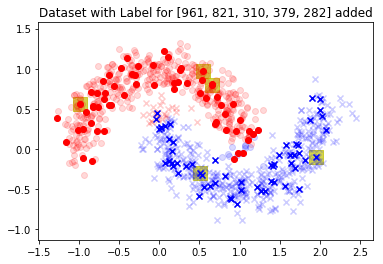

[(-1, 0.038), ([731, 986, 891, 291, 628], 0.041), ([934, 456, 518, 491, 8], 0.043), ([721, 909, 713, 860, 354], 0.043), ([961, 821, 310, 379, 282], 0.043)]


In [76]:
# Active Learning Choices  -- Sigma_Opt
fid = copy.deepcopy(fid_orig)
method = 'S'
ERRS_S, M_S = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method='S', 
                               tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_S)

calc_orig_multi took 0.082904 seconds
Iter = 0


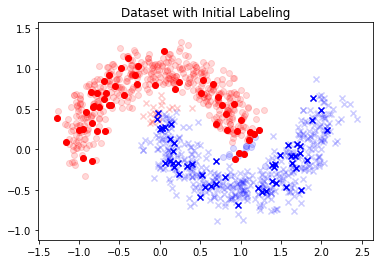

Time for V_opt = 0.003754
Time for V_opt = 0.004245
Time for V_opt = 0.004311
Time for V_opt = 0.003173
Time for V_opt = 0.005073
Iter = 1


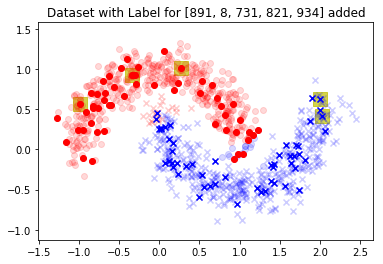

Time for V_opt = 0.003320
Time for V_opt = 0.003941
Time for V_opt = 0.003875
Time for V_opt = 0.004788
Time for V_opt = 0.004175
Iter = 2


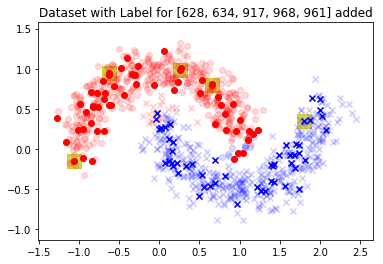

Time for V_opt = 0.002005
Time for V_opt = 0.003978
Time for V_opt = 0.003903
Time for V_opt = 0.003656
Time for V_opt = 0.002553
Iter = 3


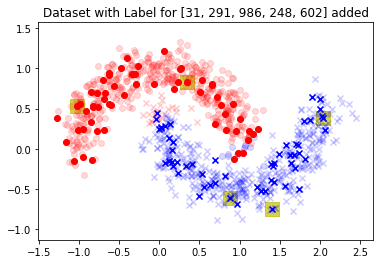

Time for V_opt = 0.003692
Time for V_opt = 0.003010
Time for V_opt = 0.005569
Time for V_opt = 0.003206
Time for V_opt = 0.002912
Iter = 4


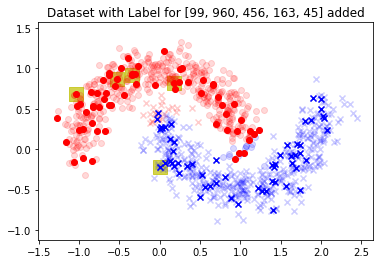

[(-1, 0.038), ([891, 8, 731, 821, 934], 0.04), ([628, 634, 917, 968, 961], 0.04), ([31, 291, 986, 248, 602], 0.041), ([99, 960, 456, 163, 45], 0.042)]


In [77]:
# Active Learning Choices  -- V_Opt
fid = copy.deepcopy(fid_orig)
method = 'V'
ERRS_V, M_V = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method=method, 
                               tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_V)

calc_orig_multi took 0.092457 seconds
Iter = 0


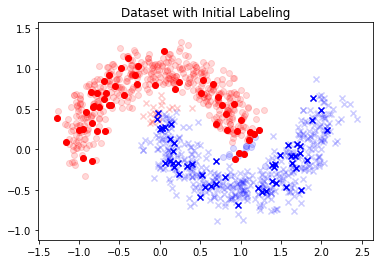

Iter = 1


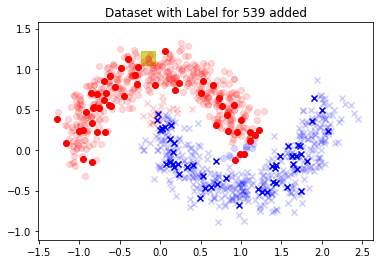

Iter = 2


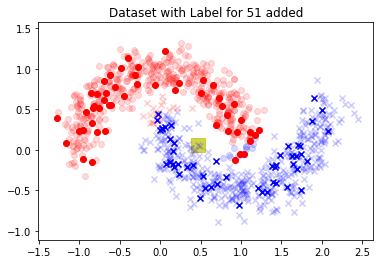

Iter = 3


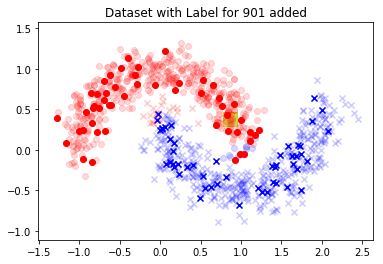

Iter = 4


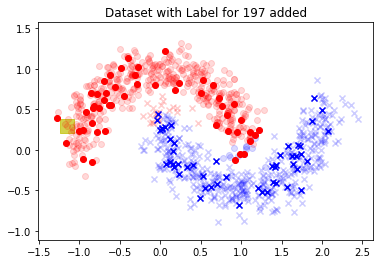

Iter = 5


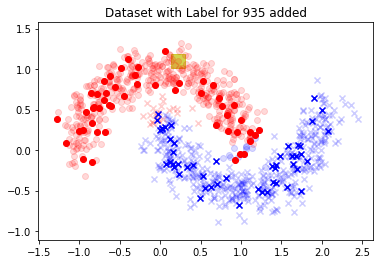

Iter = 6


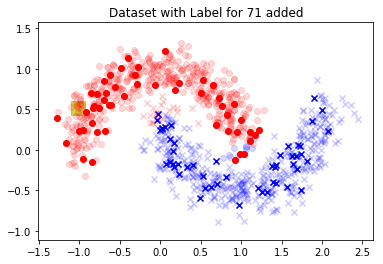

Iter = 7


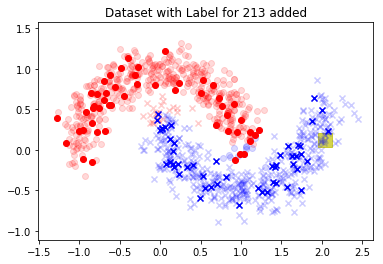

Iter = 8


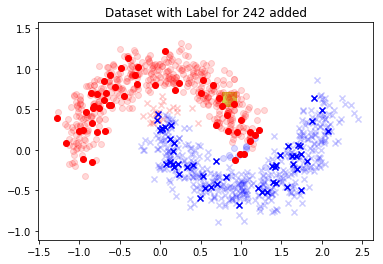

Iter = 9


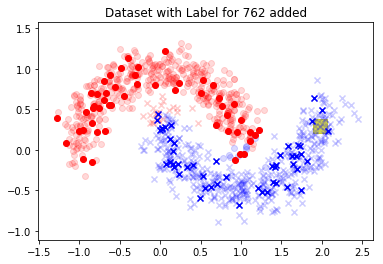

Iter = 10


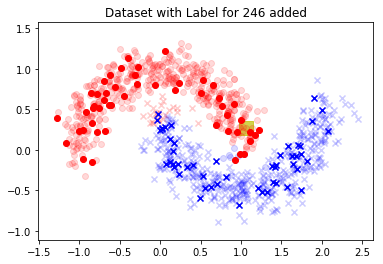

Iter = 11


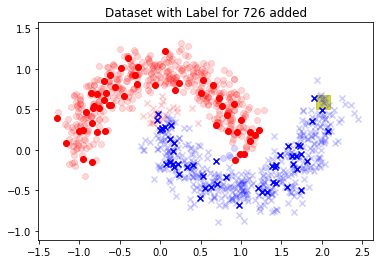

Iter = 12


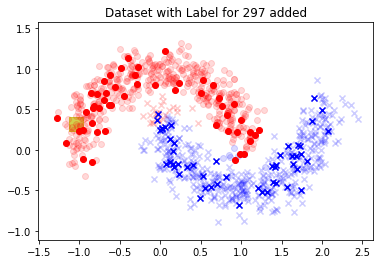

Iter = 13


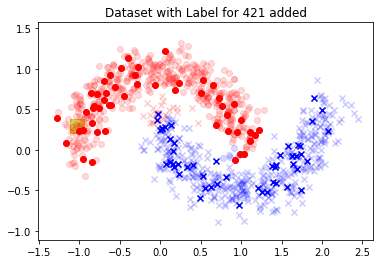

Iter = 14


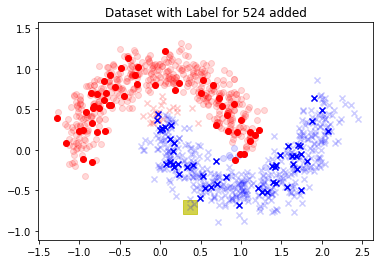

Iter = 15


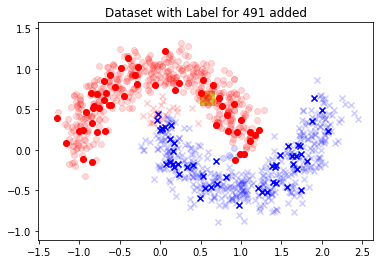

Iter = 16


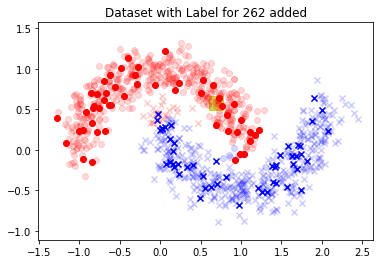

Iter = 17


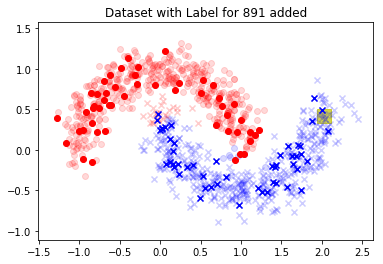

Iter = 18


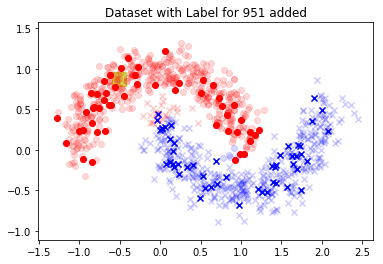

Iter = 19


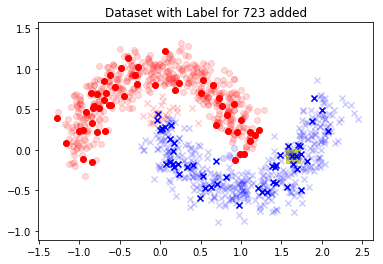

Iter = 20


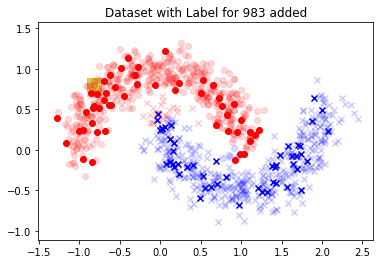

[(-1, 0.038), (539, 0.039), (51, 0.039), (901, 0.039), (197, 0.039), (935, 0.04), (71, 0.04), (213, 0.04), (242, 0.039), (762, 0.039), (246, 0.035), (726, 0.035), (297, 0.035), (421, 0.035), (524, 0.034), (491, 0.035), (262, 0.036), (891, 0.036), (951, 0.036), (723, 0.036), (983, 0.036)]


In [78]:
# Random choices
fid = copy.deepcopy(fid_orig)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(X, v, w, fid, ground_truth,tag2=tag2, 
                                        test_opts=(num_iters, verbose), show_all_iters=show_all_iters)
if verbose:
    print(ERRS_rand)

## Error Plotting - 2 Moons 

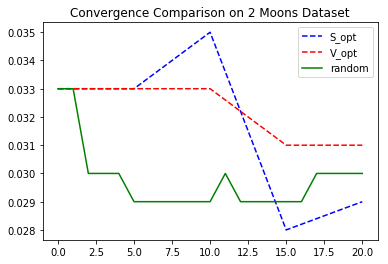

In [66]:
colors = ['y', 'r', 'k', 'g']
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'b--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.legend()
plt.title('Convergence Comparison on 2 Moons Dataset')
plt.show()

In [79]:
## 2 Gaussian Clusters

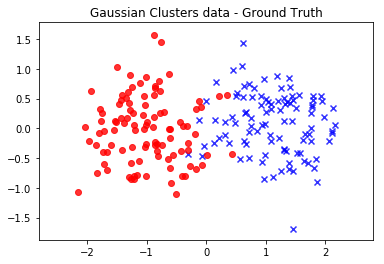

In [82]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [100,100]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[-1] = [Ns[0] + i for i in range(fs)]
ground_truth = np.array([1. if i<Ns[0] else -1. for i in range(N)])


# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W)


# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.8)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.8)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()



# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 5
tag2 = (tau, alpha, gamma2)

calc_orig_multi took 0.003159 seconds
Iter = 0


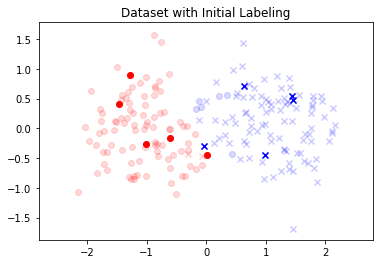

Time for S_opt = 0.000356
Time for S_opt = 0.000406
Time for S_opt = 0.000190
Time for S_opt = 0.000303
Time for S_opt = 0.000324
Iter = 1


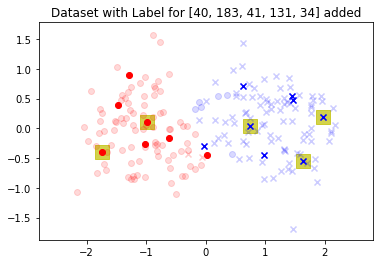

Time for S_opt = 0.000445
Time for S_opt = 0.000111
Time for S_opt = 0.000122
Time for S_opt = 0.000127
Time for S_opt = 0.000114
Iter = 2


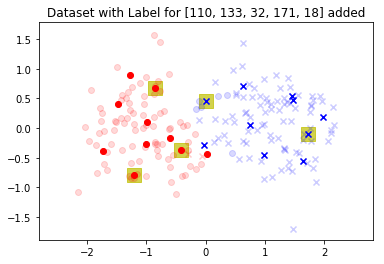

Time for S_opt = 0.000411
Time for S_opt = 0.000113
Time for S_opt = 0.000158
Time for S_opt = 0.000159
Time for S_opt = 0.000171
Iter = 3


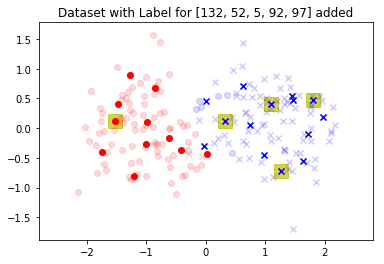

Time for S_opt = 0.000373
Time for S_opt = 0.000153
Time for S_opt = 0.000150
Time for S_opt = 0.000158
Time for S_opt = 0.000113
Iter = 4


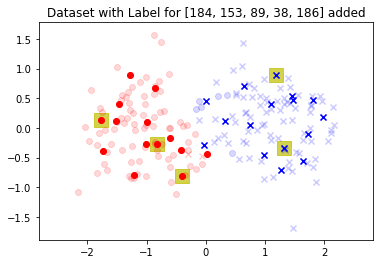

[(-1, 0.04), ([40, 183, 41, 131, 34], 0.04), ([110, 133, 32, 171, 18], 0.04), ([132, 52, 5, 92, 97], 0.04), ([184, 153, 89, 38, 186], 0.04)]


In [83]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(fid_orig)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_S)